In [ ]:
# Importing relevant libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers, activations, callbacks
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10

In [ ]:
# Loading the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# Data pre-processing
X_train, X_test = X_train/255 , X_test / 255

# Data augmentation
augment = ImageDataGenerator(rotation_range = 15, horizontal_flip = True, height_shift_range=0.1, width_shift_range=0.1, zoom_range=0.3)
augment.fit(X_train)

In [ ]:
# Loading the VGG19 base layer

base = VGG19(include_top= False, input_shape=(x_train[0].shape), classes=10)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
# Setting up the Transfer learning model

model = Sequential()

model.add(base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation= 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))
model.add(layers.Dense())

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

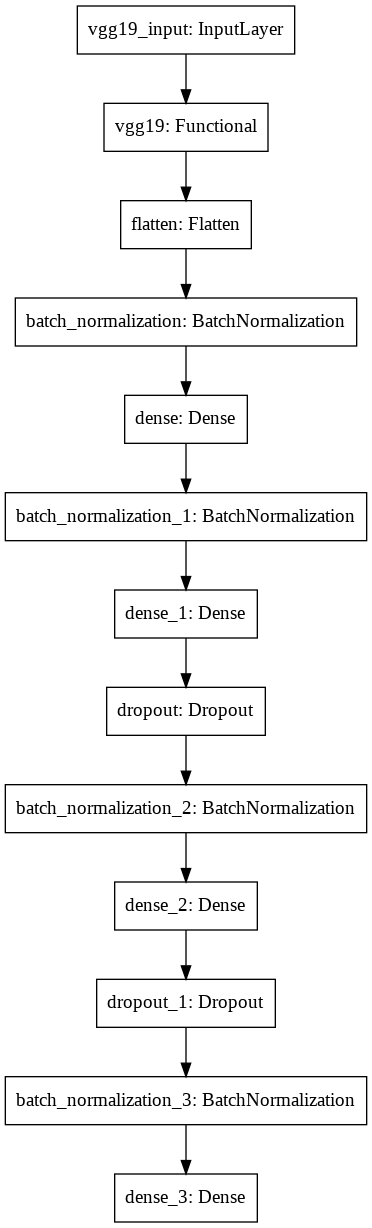

In [ ]:
# A flowchart of the model
tf.keras.utils.plot_model(model, 'TRANSFER LEARNING MODEL.png')

In [ ]:
# Callbacks for early stopping and saving

earlystop = callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    patience = 10,
    verbose = 1,
)

checkpoint = callbacks.ModelCheckpoint(
    filepath = '/content/drive/MyDrive/Colab Notebooks/transfer_sgd.h5',
    monitor = 'val_accuracy',
    verbose = 1,
    save_best_model = True
)

In [ ]:
# Compiling the model

opt = 'sgd'

model.compile(optimizer= opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train , y_train, 
                    epochs= 100, 
                    batch_size = 128, 
                    validation_split=0.2)

Epoch 1/100
313/313 [==============================] - 22s 70ms/step - loss: 2.1887 - accuracy: 0.2849 - val_loss: 2.1186 - val_accuracy: 0.3945
Epoch 2/100
313/313 [==============================] - 22s 70ms/step - loss: 1.9697 - accuracy: 0.5572 - val_loss: 1.8793 - val_accuracy: 0.6392
Epoch 3/100
313/313 [==============================] - 22s 70ms/step - loss: 1.8695 - accuracy: 0.6557 - val_loss: 1.9688 - val_accuracy: 0.5112
Epoch 4/100
313/313 [==============================] - 22s 70ms/step - loss: 1.8119 - accuracy: 0.7054 - val_loss: 1.8297 - val_accuracy: 0.6674
Epoch 5/100
313/313 [==============================] - 22s 70ms/step - loss: 1.7737 - accuracy: 0.7361 - val_loss: 1.8022 - val_accuracy: 0.6737
Epoch 6/100
313/313 [==============================] - 22s 70ms/step - loss: 1.7478 - accuracy: 0.7562 - val_loss: 1.7846 - val_accuracy: 0.6976
Epoch 7/100
313/313 [==============================] - 22s 70ms/step - loss: 1.7237 - accuracy: 0.7733 - val_loss: 1.7247 - val_ac

In [ ]:
# Testing accuracy
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.6113 - accuracy: 0.8493


[1.6112666130065918, 0.8493000268936157]

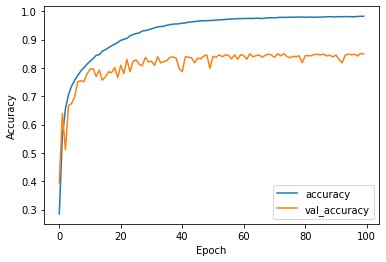

In [ ]:
# Plotting training and validation accuracy over epochs

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('transfer_learning_accuracy.png')

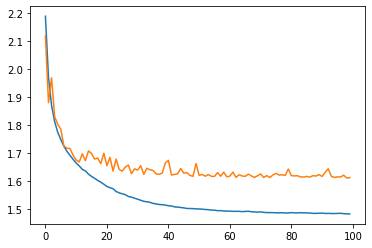

In [ ]:
# Plotting training and validation accuracy over epochs

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.savefig('transfer_learning_loss.png')